In [19]:
from qrem.cn import simulation as cnsimulation 
from qrem.mitigation import mitigation_routines
from qrem.benchmarks import hamiltonians
from qrem.characterization import characterization_routine
from datetime import date
from qrem.providers import simulation as simulate_experiment
from qrem.qtypes.characterization_data import CharacterizationData
from qrem.qtypes.mitigation_data import MitigationData
from qrem.visualisation import benchmark_plots_functions

<a id='Overview'></a>
# Tutorial overview

Currently available noisy intermediate scale quantum (NISQ) devices are prone to errors. QREM is a software package allowing to characterize and mitigate readout occurring on large scale devices. The emphasis is put on diagnostics and mitigation of correlated and non-local error errors occurring in these devices.

The purpose of this tutorial is to demonstrate the basic workflow of the QREM package. We will cover:

1. [Preparation of experiments characterizing readout noise](#Part1)


2. [Execution of the experiments on simulators/real quantum hardware](#Part2)

    2.1 [Initial steps](#Part2)
    
    2.2 [Experiment preparation](#Part22)
    
    2.3 [Experiment implementation](#Part23)
    

3. [Analysis of the experimental data](#Part3)

    3.1 [3.1 Basic postprocessing of the experimental results into QREM data format](#Postprocessing)
    
    3.2 [Addition of correlated readout noise (optional, only for simulator experiments)](#NoiseAddition)
    
    3.3 [Marginals computation](#Part33)
    
    3.4 [Calculation of reduced POVMs](#Part34)
    
    3.5 [Calculation of POVM distances](#POVMsDistances)
    
    3.6 [Quantification of POVMs coherences](#POVMsCoherences)
    
    3.7 [Calculation of correlation coefficients](#CorrelationCoefficients)
    
    3.8 [Plotting correlation coefficients](#PlottingCorrelationCoefficients)


4. [Reconstruction of a noise model from the experimental data](#Reconstruction)

    4.1 [Finding Clusters](#FindingClusters)
    
    4.2 [Computing noise matrices](#NoiseMatrices) 


<a id='Part1'></a>
## 1. Preparation of experiments characterizing readout noise

The first step in experiment preparation is creation of characterization circuits. 
This requires specifying the following parameters: 

1. number_of_qubits - a variable describing number of qubits for which characterization is going to be performed. Note that number_of_qubits is not necessarily equal to the total numbers of qubits in a device, as one may be interested in characterization  only a subset of all qubits. In the example below we set number of qubits to 10

2. experiment_name - a string specifying a typ of readout characterization experiment to be performed. QREM supports two types of characterization experiments Quantum Detector Overlapping Tomography ('QDOT') or Diagonal Detector Overlapping Tomography ('DDOT').  Here we choose 'QDOT'. 

3. Number of characterization circuits: number of circuits that are created to perform characterization.

4. Number of shots (number of each circuits repetition)

5. include_benchmark_circuits - a bool variable indicating whether the experiment should include circuits that are going to be used in noise model reconstruction and mitigation benchmarks  




In [20]:

number_of_qubits = 10

experiment_type = "DDOT"

number_of_circuits = 200

number_of_shots = 10**4

include_benchmark_circuits = True

number_of_benchmark_circuits = 10




In [21]:

number_of_4_qubit_clusters = 0

number_of_3_qubit_clusters = 0

number_of_2_qubit_clusters = 5

number_of_1_qubit_clusters = 0

clusters_specification = [[4,number_of_4_qubit_clusters], [3,number_of_3_qubit_clusters], [2, number_of_2_qubit_clusters], [1, number_of_1_qubit_clusters]]

In [22]:

noise_model_simulation=cnsimulation.create_random_noise_model(number_of_qubits=number_of_qubits,clusters_specification=clusters_specification)


marginals_to_mitigate=list(noise_model_simulation.clusters_tuple) 


In [23]:



characterization_data_container = CharacterizationData()

characterization_data_container.experiment_type = 'DDOT'

In [24]:
if include_benchmark_circuits:
    
    hamiltonians_dictionary, circuits_ground_states = hamiltonians.create_hamiltonians_and_ground_states(number_of_qubits=number_of_qubits,number_of_benchmark_circuits=number_of_benchmark_circuits)

characterization_data_container.results_dictionary = simulate_experiment.simulate_noisy_experiment(noise_model=noise_model_simulation,number_of_circuits=number_of_circuits,number_of_shots=number_of_shots,save_data=True,new_data_format=True,ground_states_circuits=circuits_ground_states,data_directory='').counts

characterization_data_container.ground_states_list  = list(characterization_data_container.results_dictionary)[-number_of_benchmark_circuits:]

10
completeness: True
Adding 190 random circuits to a 10-element set
Set of 200 circuits, completeness: True
Saving pickled file to:  '.'
Saving pickled file to:  '.'
noiseless results saved
noisy results generated in: 17.002562046051025 seconds
Saving pickled file to:  '.'
Saving pickled file to:  '.'


In [25]:
characterization_data_container= characterization_routine.execute_characterization_workflow(characterization_data_container=characterization_data_container)


MARGINALS COMPUTATION FINISHED


100%|██████████| 55/55 [00:00<00:00, 1760.15it/s]


REDUCED POVMS COMPUTATION FINISHED

Calculating errors of type: ('worst_case', 'classical')


100%|██████████| 10/10 [00:00<?, ?it/s]


DONE
POVMS DISTANCES COMPUTATION FINISHED

Calculating correlations of type: ('worst_case', 'classical')


100%|██████████| 45/45 [00:00<00:00, 1439.87it/s]

DONE
PAIRWISE READOUT ERRORS CORRELATION COEFFICIENTS FINISHED

Current max cluster size: 2
find_all_neighborhoods starts
Calculated marginals are missing given subset: (0, 1, 9), calculating and filling int
Calculated marginals are missing given subset: (0, 1, 9), calculating and filling int
Calculated marginals are missing given subset: (0, 1, 9), calculating and filling int
Calculated marginals are missing given subset: (0, 1, 9), calculating and filling int
Calculated marginals are missing given subset: (0, 1, 9), calculating and filling int
Calculated marginals are missing given subset: (0, 1, 9), calculating and filling int
Calculated marginals are missing given subset: (0, 1, 9), calculating and filling int
Calculated marginals are missing given subset: (0, 1, 9), calculating and filling int
Calculated marginals are missing given subset: (0, 1, 9), calculating and filling int
Calculated marginals are missing given subset: (0, 1, 9), calculating and filling int
Calculated margina

Calculated marginals are missing given subset: (0, 6, 9), calculating and filling int
Calculated marginals are missing given subset: (0, 6, 9), calculating and filling int
Calculated marginals are missing given subset: (0, 6, 9), calculating and filling int
Calculated marginals are missing given subset: (0, 6, 9), calculating and filling int
Calculated marginals are missing given subset: (0, 6, 9), calculating and filling int
Calculated marginals are missing given subset: (0, 6, 9), calculating and filling int
Calculated marginals are missing given subset: (0, 6, 9), calculating and filling int
Calculated marginals are missing given subset: (0, 6, 9), calculating and filling int
Calculated marginals are missing given subset: (0, 6, 9), calculating and filling int
Calculated marginals are missing given subset: (0, 6, 9), calculating and filling int
Calculated marginals are missing given subset: (0, 6, 9), calculating and filling int
Calculated marginals are missing given subset: (0, 6, 

In [26]:
#################################################################################
###  Optional step                                                          #####
###  Uncomment to include created noise model in mitigation                 #####
#################################################################################

characterization_data_container.noise_model_list.append(noise_model_simulation) 

In [27]:
#################################################################################
#### Hamiltonians are generated                                ##################
#################################################################################

energy_dictionary= hamiltonians.eigenstate_energy_calculation_and_estimation(characterization_data_container.benchmark_results_dictionary ,  characterization_data_container.benchmark_marginals_dictionary ,hamiltonians_dictionary)

10it [00:00, 639.91it/s]


In [28]:
#################################################################################
#### Mitigation routine starts                                 ##################
#################################################################################
        
mitigation_data = MitigationData()

noise_models_mitigation_results_dictionary = mitigation_routines.estimate_mitigated_energy_over_noise_models(characterization_data=characterization_data_container ,hamiltonians_dictionary=hamiltonians_dictionary,return_marginals=True)

     
mitigation_data.noise_models_mitigation_results_dictionary = noise_models_mitigation_results_dictionary    

100%|██████████| 10/10 [00:00<00:00, 123.13it/s]


In [29]:
#################################################################################
#### Mitigation error is computed                                 ###############
#################################################################################


noise_models_mitigated_energy_dictionary_error = mitigation_routines.compute_mitigation_errors(mitigation_data=mitigation_data,hamiltonian_energy_dictionary=energy_dictionary,number_of_qubits=number_of_qubits)

mitigation_data.noise_models_mitigated_energy_dictionary_error = noise_models_mitigated_energy_dictionary_error 

In [30]:
####################################################################################### 
#### Mean of mitigation error for different noise models is computed and displayed  ###
#######################################################################################


noise_models_mitigated_energy_dictionary_error_statistics= mitigation_routines.compute_mitigation_error_median_mean(mitigation_data=mitigation_data, print_results=True)

mitigation_data.noise_models_mitigated_energy_dictionary_error_statistics = noise_models_mitigated_energy_dictionary_error_statistics

((0,), (1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,))
Mitigation error mean 0.6703452558775937
Mitigation error median 0.6703337793227655
((0, 9), (4, 5), (6, 7), (2, 3), (1, 8))
Mitigation error mean 0.060132782728543145
Mitigation error median 0.05472024116550607
((4, 5), (1, 8), (0, 9), (6, 7), (2, 3))
Mitigation error mean 0.05901467287832169
Mitigation error median 0.052603246485660546


In [31]:
####################################################################################### 
#### Result of mitigation is saved                                                  ###
#######################################################################################



name_string = str(date.today()) + " q" + str(number_of_qubits) 

        

file_name_mitigation_results  = 'DDOT_mitigation_results_workflow_' + name_string +'.pkl'

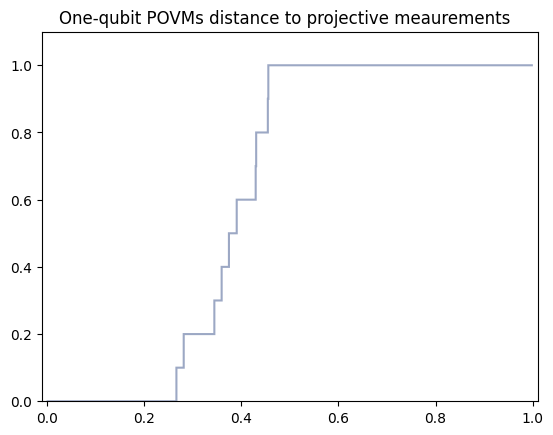

<Figure size 640x480 with 0 Axes>

In [32]:
benchmark_plots_functions.create_POVMs_distance_histogram(POVMs_errors=characterization_data_container.POMVs_errors_dictionary,number_of_qubits=number_of_qubits)

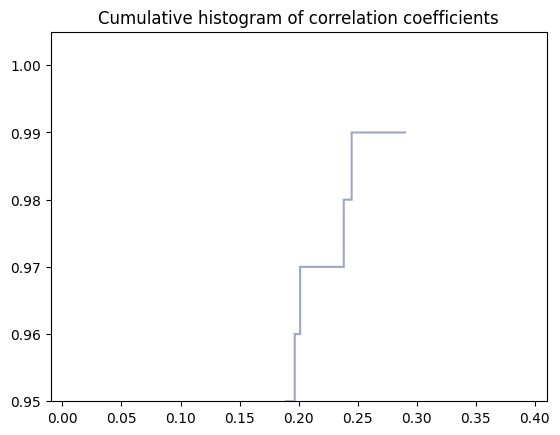

<Figure size 640x480 with 0 Axes>

In [33]:
distances_types = ('worst_case','classical')

benchmark_plots_functions.create_correlations_distance_histogram(correlations_coefficients_matrix=characterization_data_container.correlation_coefficients_dictionary[distances_types[0]][distances_types[1]])

In [34]:


predicted_energy_dictionary = mitigation_routines.compute_noisy_energy_over_noise_models(characterization_data=characterization_data_container,hamiltonians_dictionary=hamiltonians_dictionary)








100%|██████████| 10/10 [00:00<00:00, 320.04it/s]


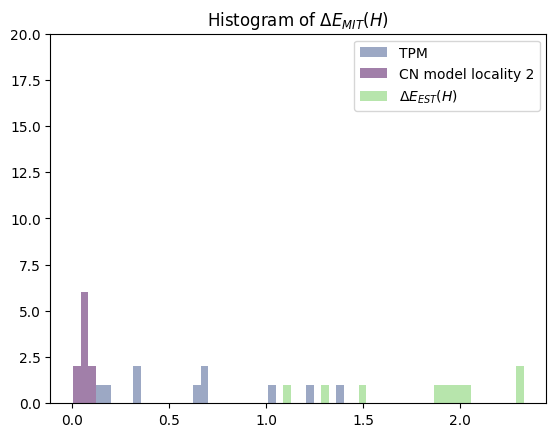

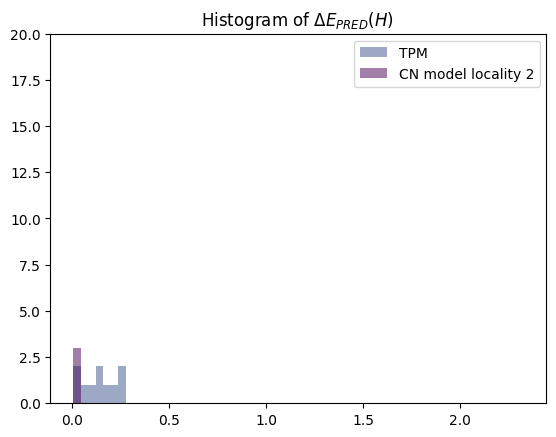

<Figure size 640x480 with 0 Axes>

In [35]:
benchmark_plots_functions.create_error_mitigation_prediction_histogram(mitigation_data=mitigation_data,noise_models_predicted_energy_dictionary=predicted_energy_dictionary,energy_dictionary=energy_dictionary,number_of_qubits=number_of_qubits)